CUSTOMER SEGMENTATION

## Project Task

 Segmenting customers using a machine learning algorithm (KMeans Clustering) in
Python to understand the spending behavior of a mall customers
and group them so the marketing team can plan their marketing strategies
accordingly.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.cluster import KMeans

## OVERVIEW
1. DATA PRE PROCESSING/DATA CLEANING
2. DATA ANALYSIS
3. SEGMENTATION WITH K MEANS 


DATA PRE PROCESSING/DATA CLEANING

In [50]:
df=pd.read_csv("Group4-data.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#checking the number of rows and columns
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df["CustomerID"]=df["CustomerID"].astype("str")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    object
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


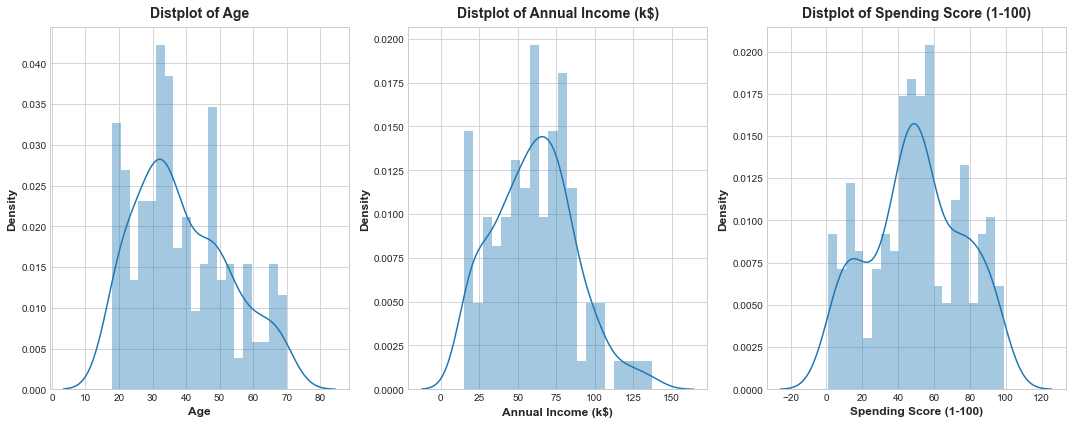

In [55]:
plt.figure(1 , figsize = (15 , 6))
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,)
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title(f'Distplot of {x}')
plt.show()

## Count Plot of Gender

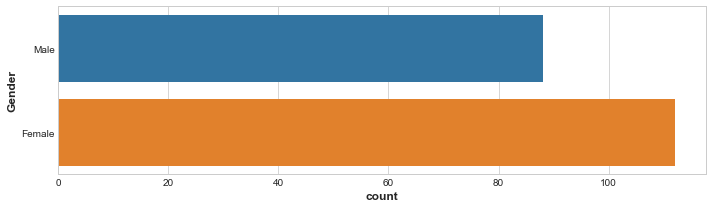

In [57]:
plt.figure(1 , figsize = (10 , 3))
sns.countplot(y = 'Gender' , data = df)
plt.show()

Creating df for ind variables

In [52]:
ind=df[["Annual Income (k$)","Spending Score (1-100)"]]
ind.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### finding the number of clusters using the elbow method

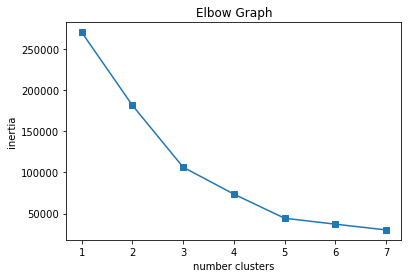

In [9]:
inert=[]
from sklearn.cluster import KMeans
for i in range(1,8):
    kmean=KMeans(n_clusters=i)
    kmean.fit(ind)
    inert.append(kmean.inertia_)
plt.plot(range(1,8),inert,"-s")
plt.xlabel("number clusters")
plt.ylabel("inertia")
plt.title("Elbow Graph")
plt.show()

Training model


In [10]:
kmean=KMeans(n_clusters=5,random_state=40)
ind_train=kmean.fit_predict(ind)


In [11]:
ind_train

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [20]:
x=ind.iloc[:,0]
y=ind.iloc[:,1]
x,y


(0       15
 1       15
 2       16
 3       16
 4       17
       ... 
 195    120
 196    126
 197    126
 198    137
 199    137
 Name: Annual Income (k$), Length: 200, dtype: int64,
 0      39
 1      81
 2       6
 3      77
 4      40
        ..
 195    79
 196    28
 197    74
 198    18
 199    83
 Name: Spending Score (1-100), Length: 200, dtype: int64)

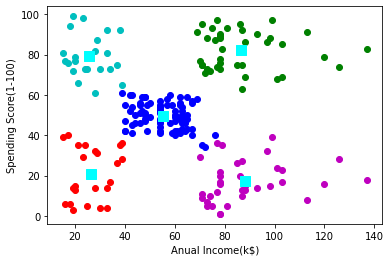

In [13]:
plt.scatter(x[ind_train==0],y[ind_train==0],c="r",label="Cluster 0")
plt.scatter(x[ind_train==1],y[ind_train==1],c="blue",label="Cluster 1")
plt.scatter(x[ind_train==2],y[ind_train==2],c="green",label="Cluster 2")
plt.scatter(x[ind_train==3],y[ind_train==3],c="m",label="Cluster 3")
plt.scatter(x[ind_train==4],y[ind_train==4],c="c",label="Cluster 4")
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], s=100, c='cyan',marker ='s', label='Centroids')
plt.xlabel("Anual Income(k$)")
plt.ylabel("Spending Score(1-100)")
plt.show()


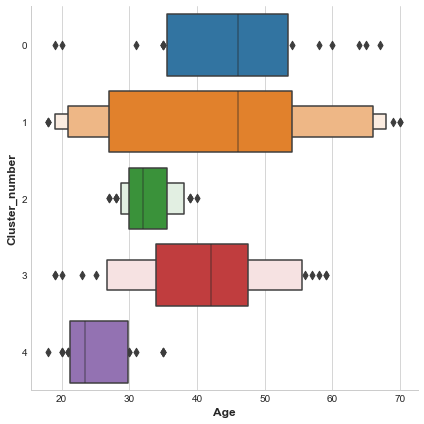

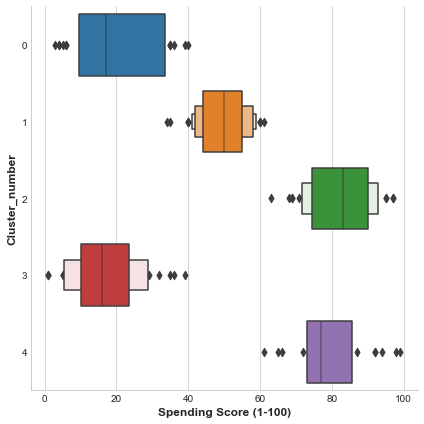

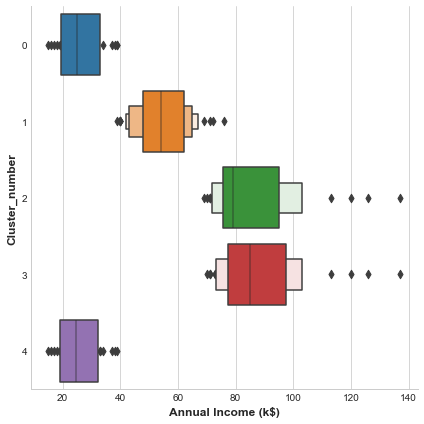

In [65]:
sns.catplot(x="Age", y="Cluster_number", data=df1, kind="boxen", height=6)
sns.catplot(x="Spending Score (1-100)", y="Cluster_number", data=df1, kind="boxen", height=6)
sns.catplot(x='Annual Income (k$)', y="Cluster_number", data=df1, kind="boxen", height=6)
plt.show()


In [64]:
import warnings 
df1=df
df1["Cluster_number"]=ind_train
df1["Cluster_number"]= df1["Cluster_number"].astype("category")
warnings.filterwarnings("ignore")
df1



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_number
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,3
197,198,Male,32,126,74,2
198,199,Male,32,137,18,3


In [48]:
df1.to_csv(r"/Users/williamdanso/Downloads/William Danso(Mid-Course Project)/cluster.csv",index=False)

### Insights and Recommendation
    
From the above clusters generated,  cluster 3 should be treated with most priority because, they have a high annual income but a low spending score. A further research should be done on customers in clusters 3 to know their preffered products which consequently will increase their spending score since they have the spending capacity. Customers in cluster 0 are the next in line because, irrespective of their low income, they have high spending score .

Furthermore, customers in cluster 1 are moderate spenders and there is a high posibility that they can do better with the right targetting and discount offers.